# Predicting that person will have Heart Attack or not

## Using Logistic Regression

<u>Note: It wil works only on binary number.</u>

To predict the value of attack we have to first understand the feature of the dataset first. The data includes total 14 columns,
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. num: 0= less chance of heart attack 1= more chance of heart attack

So let's get started.

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Import Dataset

In [2]:
df = pd.read_csv('D:/Education/Git hub/heart_attack.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


Here, from the above dataset we can clearly show that there are some missing values locating in the certain columns. So we have to fill it. We can perform this by various methods, but it's all upon data priority and  we need to understand which method will fit the best inside that dataset. So now move further to replace the missing dataset and let's take a look at methods of replacing dataset.

1. Drop the data
    - Drop the whole Row
    - Drop the whole Column
2. Fill the data
    - Replace the value by mean
    - Replace the value by frequency
    - Repalce the value based on other function 

Anyway, Droping the data will not the smartest thing to perform because with that method you will loose the data.

So, now let's replace the missing data.

In [3]:
df.dtypes

age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg         int64
thalach        object
exang           int64
oldpeak       float64
slope          object
ca             object
thal           object
num             int64
dtype: object

Every time it is not the same that missing value will with '?' so we have first replce it with the np.nan (not as null).

In [4]:
df.replace('?',np.nan, inplace=True)

Now, we have to make count that how much missingg values we have in each column

In [5]:
missing_data = df.isnull()
missing_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2,False,False,False,False,True,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,False


Here, we can see the entire details of each columns that how much missing values are in each columns.

1. age: **No** missing value
2. sex: **No** missing value
3. cp: **No** issing value
4. trestbos: **1** missing value
5. chol: **23** missing values
6. fbs: **8** missing values
7. restecg: **No** missing values
8. thalach: **1** missing values
9. exang: **No** missing values
10. oldpeak: **No** missing values
11. slope: **190** missing values
12. ca: **291** missing values
13. thal: **266** missing values
14. num: **No** missing values
 
We will use both method here for replacing the data.

**Drop the data**
    - ca
    - thal
    - slop
**Replacing the data with mean value**
    - trestbos
    - chol
    - thalac

In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

age
False    294
Name: age, dtype: int64

sex
False    294
Name: sex, dtype: int64

cp
False    294
Name: cp, dtype: int64

trestbps
False    293
True       1
Name: trestbps, dtype: int64

chol
False    271
True      23
Name: chol, dtype: int64

fbs
False    286
True       8
Name: fbs, dtype: int64

restecg
False    294
Name: restecg, dtype: int64

thalach
False    293
True       1
Name: thalach, dtype: int64

exang
False    294
Name: exang, dtype: int64

oldpeak
False    294
Name: oldpeak, dtype: int64

slope
True     190
False    104
Name: slope, dtype: int64

ca
True     291
False      3
Name: ca, dtype: int64

thal
True     266
False     28
Name: thal, dtype: int64

num       
False    294
Name: num       , dtype: int64



In [7]:
avg_trestbps = df['trestbps'].astype('float').mean(axis=0)

df['trestbps'].replace(np.nan,int(avg_trestbps), inplace=True)

In [8]:
avg_chol = df['chol'].astype('float').mean(axis=0)
df['chol'].replace(np.nan, int(avg_chol), inplace=True)

In [9]:
df['fbs'].replace(np.nan, 1, inplace=True)

In [10]:
avg_thalach = df['thalach'].astype('float').mean(axis=0)

df['thalach'].replace(np.nan, int(avg_thalach), inplace=True)

In [11]:
final_df = df.drop(columns=['ca','thal','slope'], axis=0)

final_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,250,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [12]:
missing = final_df.isnull()

for i in missing.columns.values.tolist():
    print(i)
    print(missing[i].value_counts())
    print('')

age
False    294
Name: age, dtype: int64

sex
False    294
Name: sex, dtype: int64

cp
False    294
Name: cp, dtype: int64

trestbps
False    294
Name: trestbps, dtype: int64

chol
False    294
Name: chol, dtype: int64

fbs
False    294
Name: fbs, dtype: int64

restecg
False    294
Name: restecg, dtype: int64

thalach
False    294
Name: thalach, dtype: int64

exang
False    294
Name: exang, dtype: int64

oldpeak
False    294
Name: oldpeak, dtype: int64

num       
False    294
Name: num       , dtype: int64



Now, our data containing no missing value which means it is ready to train.

In [13]:
final_df['restecg'].value_counts()

0    235
1     53
2      6
Name: restecg, dtype: int64

## 2. Split the data

Before create and train the model it is necessary to split the data into trainig and testing dataset. 

In [14]:
X = np.asarray(final_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']])
y = np.asarray(final_df['num       '])

We can see that data having different values so we have to normalize the data. There are many ways to perform normalisation but here we are using standardscaler from sklearn. 

In [15]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(X).transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=2)
print("Train set shape : ", X_train.shape)
print("Test set shape : ",X_test.shape)

Train set shape :  (220, 10)
Test set shape :  (74, 10)


## 3. Create model

As we are using logistic regression we have to create the model. So, now we have to fit the data into model. 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

Now, Let's predict the data usig train model.

In [18]:
y_hat = lr.predict(X_test)
y_hat

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

## 4. Visulise the prediction

To visualize the prediction of data, we need to construct confusion matrics. To construct the confusion matrix we have to import an inbuilt library from sklearn.metrics and to plot the confusion matrix we can use either plot_confusion_matrix or seaborn.heatmap. Here, I'm using a heatmap for better colour compression. 

[[42  8]
 [ 5 19]]


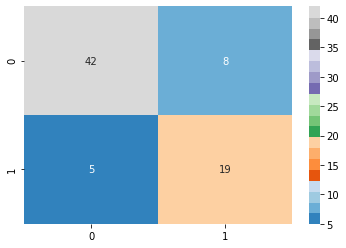

In [19]:
import seaborn as sns

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1])
print(cnf_matrix)

sns.heatmap(cnf_matrix, annot=True, cmap='tab20c')

## 5. Calculate the Accuracy of a model

It's important to calculate the score of a model, so we can understand how much our model is capable of. Here, we can see that our model's jaccard_score is almost 59% (Which is very bad score, but as we know that we have plenty of data missing so because of that this score value is less). And take a look at classification_report which shows the accuracy of 82%.
However, Log_loss is showing 51% but there is one unusual thing about log_loss that is if the score of log_loss is less means model prediction is better. The range of the log Los always remains between 0 to 1.

In [20]:
from sklearn.metrics import jaccard_score

print(jaccard_score(y_hat, y_test))

0.59375


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        50
           1       0.70      0.79      0.75        24

    accuracy                           0.82        74
   macro avg       0.80      0.82      0.81        74
weighted avg       0.83      0.82      0.83        74



In [22]:
from sklearn.metrics import log_loss

y_hat_prob = lr.predict_proba(X_test)
print(log_loss(y_test,y_hat_prob))

0.513588175250101
